In [3]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Eduardo\Desktop\hr-analytics-sql\visualizations\distribuicao_por_genero.csv")

df.head()

,ano,sexo_trabalhador,total
0,2010,Feminino,4235995
1,2010,Masculino,6126014
2,2024,Feminino,9310787
3,2024,Masculino,12422147


Gráfico salvo como 'imagens/grafico_distribuicao_genero.png'


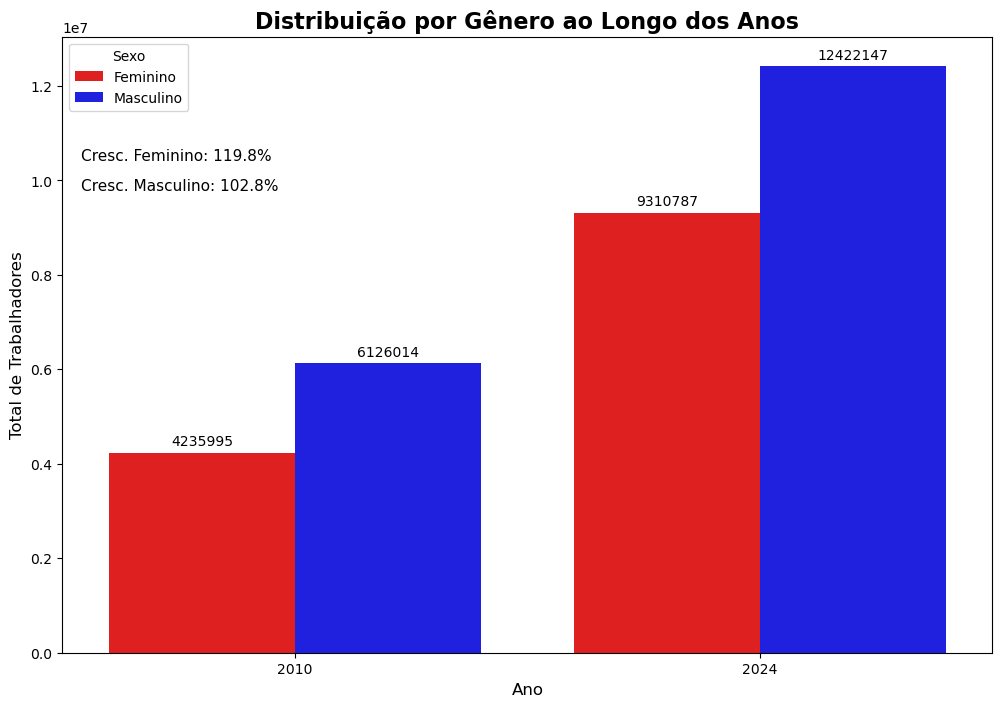

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("imagens", exist_ok=True)

def calc_growth(df, gender):
    initial = df[df['sexo_trabalhador'] == gender].iloc[0]['total']
    final = df[df['sexo_trabalhador'] == gender].iloc[-1]['total']
    return ((final - initial) / initial * 100)


plt.figure(figsize=(12, 8))


colors = {'Feminino': '#FF0000', 'Masculino': '#0000FF'}


ax = sns.barplot(data=df, x='ano', y='total', hue='sexo_trabalhador', palette=colors)


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)


growth_fem = calc_growth(df, 'Feminino')
growth_masc = calc_growth(df, 'Masculino')


plt.text(0.02, 0.8, f'Cresc. Feminino: {growth_fem:.1f}%', 
         transform=ax.transAxes, ha='left', fontsize=11)
plt.text(0.02, 0.75, f'Cresc. Masculino: {growth_masc:.1f}%', 
         transform=ax.transAxes, ha='left', fontsize=11)

plt.title('Distribuição por Gênero ao Longo dos Anos', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Trabalhadores', fontsize=12)
plt.legend(title='Sexo')


plt.savefig("imagens/grafico_distribuicao_genero.png", dpi=300, bbox_inches='tight')
print("Gráfico salvo como 'imagens/grafico_distribuicao_genero.png'")

plt.show()

A visualização do gráfico criado pode ser encontrada em '/imagens' neste mesmo diretório